## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Understanding

The client is a real estate agency that advises clients on the attractiveness of renovation opportunities.  It is necessary to know the impact on the housing price of various real estate metrics, so that the price benefit can be compared to cost estimates received by the clients of the real estate agency. 

# Data Understanding

The data is housing data from a Northwestern county and comes from the county government.  Key data categories include price, number of rooms, various square footage metrics, and age of the house. Each row of data represents a different house. 

In [37]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [3]:
data = pd.read_csv('./data/kc_house_data.csv')

In [97]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,grade_num,condition_num
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,7,3
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,7,2
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,7,2
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,9,2
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,7,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [103]:
data.heat_source.unique()

array(['Gas', 'Oil', 'Electricity', 'Gas/Solar', 'Electricity/Solar',
       'Other', nan, 'Oil/Solar'], dtype=object)

In [104]:
data.sewer_system.unique()

array(['PUBLIC', 'PRIVATE', 'PRIVATE RESTRICTED', nan,
       'PUBLIC RESTRICTED'], dtype=object)

In [105]:
data.yr_built.value_counts().sort_index()

1900     118
1901      39
1902      36
1903      56
1904      73
        ... 
2018     361
2019     299
2020     507
2021    1707
2022     302
Name: yr_built, Length: 123, dtype: int64

In [106]:
data['yr_built_adj']=data['yr_built']-1900

In [143]:
data.yr_renovated.value_counts().sort_index()

0       28783
1924        1
1928        2
1930        1
1940        3
        ...  
2018       44
2019       35
2020       28
2021       69
2022       13
Name: yr_renovated, Length: 83, dtype: int64

In [107]:
data.iloc[:,[5,6,16,17,18,19]]

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio
0,1180,7140,1180,0,0,40
1,2770,6703,1570,1570,0,240
2,2880,6156,1580,1580,0,0
3,2160,1400,1090,1070,200,270
4,1120,758,1120,550,550,30
...,...,...,...,...,...,...
30150,1910,4000,1600,1130,0,210
30151,2020,5800,2020,0,0,520
30152,1620,3600,940,920,240,110
30153,2570,2889,1830,740,480,100


In [108]:
data.grade.unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '1 Cabin', '2 Substandard'], dtype=object)

In [109]:
data.yr_built.value_counts()

2021    1707
1968     516
2020     507
1978     493
1977     484
        ... 
1901      39
1935      39
1934      38
1902      36
1933      30
Name: yr_built, Length: 123, dtype: int64

In [110]:
data.condition.unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [111]:
data.price.unique()

array([ 675000.,  920000.,  311000., ..., 3754500., 2435000.,  656500.])

In [112]:
data.price.value_counts().sort_index()

27360.0       1
27563.0       1
28307.0       1
28559.0       1
28854.0       1
             ..
17800000.0    1
20000000.0    1
22750000.0    1
23500000.0    1
30750000.0    1
Name: price, Length: 5202, dtype: int64

## Convert grade data to numeric

In [114]:
grade_array = list(data['grade'])

In [115]:
grade_array_split =[]
for i in grade_array:
    split = i.split(" ")
    grade_array_split.append(split[0])

In [116]:
grade_num= grade_array_split

In [117]:
grade_num

['7',
 '7',
 '7',
 '9',
 '7',
 '7',
 '9',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '9',
 '8',
 '7',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '6',
 '9',
 '7',
 '7',
 '9',
 '9',
 '8',
 '9',
 '7',
 '8',
 '8',
 '7',
 '7',
 '10',
 '9',
 '8',
 '8',
 '10',
 '7',
 '7',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '8',
 '9',
 '7',
 '8',
 '5',
 '8',
 '7',
 '7',
 '7',
 '7',
 '8',
 '7',
 '8',
 '7',
 '9',
 '8',
 '9',
 '7',
 '7',
 '7',
 '8',
 '7',
 '8',
 '7',
 '8',
 '7',
 '9',
 '8',
 '8',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '6',
 '8',
 '8',
 '8',
 '7',
 '8',
 '7',
 '5',
 '7',
 '5',
 '7',
 '7',
 '8',
 '7',
 '8',
 '6',
 '8',
 '6',
 '8',
 '9',
 '7',
 '8',
 '5',
 '7',
 '6',
 '8',
 '7',
 '7',
 '7',
 '8',
 '7',
 '6',
 '7',
 '5',
 '7',
 '7',
 '6',
 '9',
 '8',
 '8',
 '9',
 '7',
 '6',
 '7',
 '7',
 '7',
 '8',
 '9',
 '9',
 '6',
 '9',
 '9',
 '6',
 '9',
 '6',
 '8',
 '9',
 '10',
 '7',
 '8',
 '7',
 '9',
 '8',
 '7',
 '11',
 '7',
 '7',
 '8',
 '9',
 '8',
 '10',
 '7',
 '9',
 '8',
 '9',
 '7',
 '11',
 '7',
 '11',
 '8',
 '7',
 '8',
 '7

In [118]:
grade_num

['7',
 '7',
 '7',
 '9',
 '7',
 '7',
 '9',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '9',
 '8',
 '7',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '6',
 '9',
 '7',
 '7',
 '9',
 '9',
 '8',
 '9',
 '7',
 '8',
 '8',
 '7',
 '7',
 '10',
 '9',
 '8',
 '8',
 '10',
 '7',
 '7',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '8',
 '9',
 '7',
 '8',
 '5',
 '8',
 '7',
 '7',
 '7',
 '7',
 '8',
 '7',
 '8',
 '7',
 '9',
 '8',
 '9',
 '7',
 '7',
 '7',
 '8',
 '7',
 '8',
 '7',
 '8',
 '7',
 '9',
 '8',
 '8',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '6',
 '8',
 '8',
 '8',
 '7',
 '8',
 '7',
 '5',
 '7',
 '5',
 '7',
 '7',
 '8',
 '7',
 '8',
 '6',
 '8',
 '6',
 '8',
 '9',
 '7',
 '8',
 '5',
 '7',
 '6',
 '8',
 '7',
 '7',
 '7',
 '8',
 '7',
 '6',
 '7',
 '5',
 '7',
 '7',
 '6',
 '9',
 '8',
 '8',
 '9',
 '7',
 '6',
 '7',
 '7',
 '7',
 '8',
 '9',
 '9',
 '6',
 '9',
 '9',
 '6',
 '9',
 '6',
 '8',
 '9',
 '10',
 '7',
 '8',
 '7',
 '9',
 '8',
 '7',
 '11',
 '7',
 '7',
 '8',
 '9',
 '8',
 '10',
 '7',
 '9',
 '8',
 '9',
 '7',
 '11',
 '7',
 '11',
 '8',
 '7',
 '8',
 '7

In [119]:
data['grade_num']=grade_num

In [120]:
data['grade_num']=data['grade_num'].astype(int)

In [121]:
data['grade_num']

0        7
1        7
2        7
3        9
4        7
        ..
30150    8
30151    7
30152    7
30153    8
30154    7
Name: grade_num, Length: 30155, dtype: int32

<AxesSubplot:xlabel='grade_num', ylabel='price'>

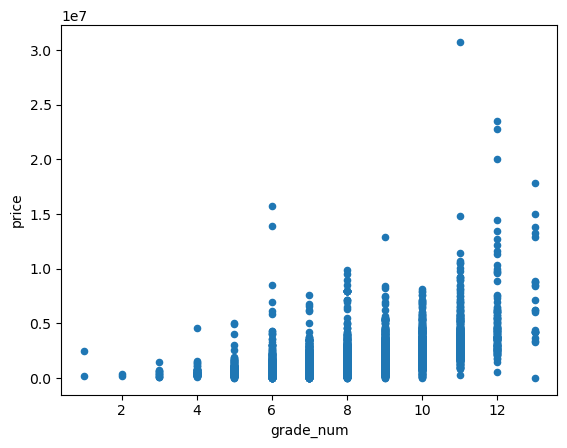

In [122]:
data.plot(kind = 'scatter', x = 'grade_num', y='price')

Apparent correlation between grade and price.

## Convert condition data to numeric

In [129]:
condition_num = data['condition'].replace({'Good': 3, 'Average':2, 'Very Good':4, 'Fair':1, 'Poor':0})

In [124]:
data['condition_num'] =condition_num

<AxesSubplot:xlabel='condition_num', ylabel='price'>

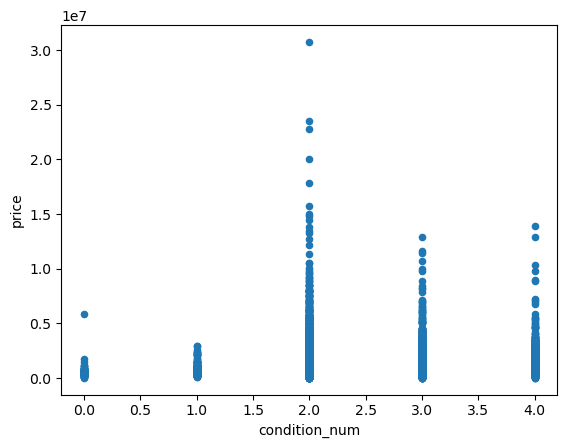

In [125]:
data.plot(kind = 'scatter', x = 'condition_num', y='price')

Some correlation between condition and price.

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

## Convert view variable to numeric

In [137]:
view_num = data['view'].replace({'NONE': 0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4})

In [148]:
data['view_num']=view_num

In [201]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,grade_num,condition_num,yr_built_adj,view_num
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479,0.002979,-0.010001,0.023071,-0.008120
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509,0.565263,-0.008704,0.096013,0.315265
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689,0.374764,0.035438,0.146191,0.054506
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400,0.647784,-0.064890,0.443648,0.155433
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669,0.721359,-0.053933,0.291694,0.242278
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308,0.053337,-0.000114,0.001750,0.096005
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781,0.464772,-0.281849,0.544646,-0.007652
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744,0.702277,-0.136394,0.387448,0.132554
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208,0.139084,0.094894,-0.230226,0.264925
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861,0.497407,-0.067492,0.447560,0.029903


## Create dummy variables

In [176]:
data_wdum= pd.get_dummies(data, columns = ['waterfront','heat_source','greenbelt','nuisance','sewer_system'], drop_first=True)

In [179]:
data_wdum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               30155 non-null  int64  
 1   date                             30155 non-null  object 
 2   price                            30155 non-null  float64
 3   bedrooms                         30155 non-null  int64  
 4   bathrooms                        30155 non-null  float64
 5   sqft_living                      30155 non-null  int64  
 6   sqft_lot                         30155 non-null  int64  
 7   floors                           30155 non-null  float64
 8   view                             30155 non-null  object 
 9   condition                        30155 non-null  object 
 10  grade                            30155 non-null  object 
 11  sqft_above                       30155 non-null  int64  
 12  sqft_basement     

In [181]:
df = data_wdum

## Check correlations with new dummy variables

In [184]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,greenbelt_YES,nuisance_YES,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,...,0.065247,0.000669,-0.018431,-0.002970,-0.013561,0.056260,-0.051752,-0.008856,0.147135,-0.008663
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,...,0.143009,0.036684,-0.067977,-0.002266,0.001132,0.068256,0.011547,-0.005218,0.021788,-0.001262
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,...,0.230824,0.014343,-0.090863,-0.007786,-0.018727,0.064844,-0.050826,-0.015524,0.036675,0.002572
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,...,0.273275,0.032520,-0.251658,-0.007571,-0.014762,0.093470,-0.050673,-0.006630,0.035925,0.001853
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,...,0.274636,0.031879,-0.142542,-0.002955,-0.005183,0.115545,-0.059699,-0.009353,-0.059627,0.000521
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,...,-0.072222,0.001213,0.009738,-0.001389,0.059327,-0.012787,0.012449,0.002086,-0.359687,-0.002052
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,...,0.121139,0.001533,-0.221264,-0.005955,-0.001974,0.065007,-0.016292,-0.001081,0.132968,0.013878
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,...,0.292732,0.016173,-0.168157,-0.006161,-0.003575,0.134854,-0.093882,-0.009634,-0.080276,0.002595
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,...,-0.014643,0.031717,0.120700,0.005742,-0.003891,-0.033825,0.072240,-0.003433,0.046279,-0.002255
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,...,0.303519,0.003391,-0.197823,-0.010690,-0.008989,0.127819,-0.147531,-0.009308,-0.120331,-0.000007


In [199]:
df_c = df.loc[:,['price','heat_source_Electricity/Solar','waterfront_YES', 'view_num','yr_built_adj','condition_num','grade_num','yr_renovated']]

In [200]:
df_c.corr()

,price,heat_source_Electricity/Solar,waterfront_YES,view_num,yr_built_adj,condition_num,grade_num,yr_renovated
price,1.000000,-0.008419,0.232250,0.315265,0.096013,-0.008704,0.565263,0.084786
heat_source_Electricity/Solar,-0.008419,1.000000,-0.005859,0.011942,0.003658,0.015162,-0.004200,0.015572
waterfront_YES,0.232250,-0.005859,1.000000,0.425007,-0.042971,0.002685,0.042152,0.097940
view_num,0.315265,0.011942,0.425007,1.000000,-0.086632,0.031295,0.198986,0.109863
yr_built_adj,0.096013,0.003658,-0.042971,-0.086632,1.000000,-0.319044,0.481647,-0.239284
condition_num,-0.008704,0.015162,0.002685,0.031295,-0.319044,1.000000,-0.153135,-0.079236
grade_num,0.565263,-0.004200,0.042152,0.198986,0.481647,-0.153135,1.000000,-0.012093
yr_renovated,0.084786,0.015572,0.097940,0.109863,-0.239284,-0.079236,-0.012093,1.000000


Only dummy variables correlated with price is waterfront properties.

# Data Modeling

## Run baseline model

In [196]:
import statsmodels.api as sm

In [197]:
baseline_model = sm.OLS(df['price'], sm.add_constant(df['sqft_living']))
baseline_results = baseline_model.fit()

In [198]:
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        14:16:11   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""